In [2]:
import torch
import numpy as np
from PIL import Image
import pandas as pd

In [1]:
!git clone https://github.com/ksana-kozlova/X-VLM.git

Cloning into 'X-VLM'...
remote: Enumerating objects: 308, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 308 (delta 41), reused 41 (delta 41), pack-reused 263
Receiving objects: 100% (308/308), 12.46 MiB | 12.51 MiB/s, done.
Resolving deltas: 100% (135/135), done.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
% cd /content
! mkdir -p /content/X-VLM/data/ /content/X-VLM/images/ 
#! cp /content/drive/MyDrive/ImageCaptioning/caption_base_best.pt OFA/checkpoints/

/content


In [5]:
% cd /content/X-VLM/
!pip install -r requirements.txt

/content/X-VLM
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 346 kB 4.1 MB/s 
     |████████████████████████████████| 3.1 MB 91.2 MB/s 
     |████████████████████████████████| 109 kB 91.5 MB/s 
     |████████████████████████████████| 776.8 MB 16 kB/s 
     |████████████████████████████████| 12.8 MB 30.4 MB/s 
     |████████████████████████████████| 104.3 MB 115 kB/s 
     |████████████████████████████████| 3.3 MB 16.9 MB/s 
     |████████████████████████████████| 86 kB 6.4 MB/s 
     |████████████████████████████████| 596 kB 85.0 MB/s 
     |████████████████████████████████| 880 kB 87.8 MB/s 
     |████████████████████████████████| 546 kB 34.9 MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=a95b1a2f100c54838222ea82d6775e91c08076c5e4ab1157a5fa98f819973538
  Stored in directory: /root/.cache/pip/wheels/87/39/dd/a83eeef36d0bf98e7a4d1933a4ad2d660

In [6]:
!pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=13aac644a70540bd12382ea32ff305c1de06988bf06b706949a82d811397e3bc
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [7]:
import wget
import zipfile

In [8]:
% cd /content
! mkdir -p /content/X-VLM/images/flickr8k-images/

/content


Best checkpoints you can download from https://drive.google.com/file/d/18ZCPAEU2rde4J3xFM5pw5rviXTWZy85h/view?usp=sharing 

In [9]:
! mkdir -p /content/X-VLM/4m_base_finetune/flickr8k_caption/
! cp /content/drive/MyDrive/ImageCaptioning/4m_base_model_state_step_199999.th /content/X-VLM/4m_base_finetune/flickr8k_caption/

In [ ]:
% cd /content/
url = 'http://cs.stanford.edu/people/karpathy/deepimagesent/caption_datasets.zip'
wget.download(url)

/content


'caption_datasets.zip'

In [ ]:
archive = 'caption_datasets.zip'
with zipfile.ZipFile(archive, 'r') as zip_file:
    zip_file.extractall()

This archiv of dataset you can download from https://www.kaggle.com/datasets/adityajn105/flickr8k

And captions.txt also

In [10]:
% cd /content/
archive = '/content/drive/MyDrive/flickr.zip'
with zipfile.ZipFile(archive, 'r') as zip_file:
    zip_file.extractall()

/content


In [11]:
! cp -r /content/Images/. /content/X-VLM/images/flickr8k-images

In [12]:
!rm -rf /content/X-VLM/images/flickr8k-images/Images

In [13]:
!cp /content/drive/MyDrive/ImageCaptioning/finetune.tar /content/
!tar -xf /content/finetune.tar

In [14]:
!cp -r /content/finetune /content/X-VLM/data/

In [15]:
!rm -rf /content/X-VLM/finetune/

Code for creating json files for images

Below you can download ready json files

In [ ]:
import json

In [ ]:
images = []
old_name = ""
captions = []
with open("/content/captions.txt") as file:
    print(file.readline())
    for line in file:
      img = line.split(",")
      if img[0] != old_name and old_name != "":
        images.append({"caption": captions, "image": old_name, "image_id": old_name[:-4]})
        captions = []
      old_name = img[0]
      captions.append(img[1][:-3] + ".")

image,caption



In [ ]:
% cd /content/

/content


In [ ]:
train_json = images[:6090]
for x in train_json:
  x["caption"] = x["caption"][0]

In [ ]:
for x in train_json:
  if x['image_id'] == '3025549604_38b86198f5':
    print("caption", x['caption'])

caption Four children on stools in a diner.


In [ ]:
with open("flickr8k_train.json", "w") as write_file:
    json.dump(train_json, write_file)

with open("flickr8k_val.json", "w") as write_file:
    json.dump(images[6090:7090], write_file)

with open("flickr8k_test.json", "w") as write_file:
    json.dump(images[7090:8090], write_file)

In [ ]:
!cp /content/flickr8k_test.json /content/drive/MyDrive/ImageCaptioning/
!cp /content/flickr8k_train.json /content/drive/MyDrive/ImageCaptioning/
!cp /content/flickr8k_val.json /content/drive/MyDrive/ImageCaptioning/

In [16]:
!cp /content/drive/MyDrive/ImageCaptioning/flickr8k_test.json /content/X-VLM/data/finetune
!cp /content/drive/MyDrive/ImageCaptioning/flickr8k_train.json /content/X-VLM/data/finetune
!cp /content/drive/MyDrive/ImageCaptioning/flickr8k_val.json /content/X-VLM/data/finetune

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
torch.cuda.device_count()

1

In [17]:
!mkdir -p /content/X-VLM/output/flickr8k_captioning/

In [19]:
% cd /content/X-VLM/
!python run.py --task "flickr8k_captioning" --dist "1" --output_dir "output/flickr8k_captioning" --checkpoint '/content/drive/MyDrive/ImageCaptioning/model_state_epoch_14.th' #"/content/drive/MyDrive/ImageCaptioning/4m_base_model_state_step_199999.th" # "/content/drive/MyDrive/ImageCaptioning/4m_base_model_state_step_199999.th"

/content/X-VLM
NNODES,  1
NPROC_PER_NODE,  1
MASTER_ADDR,  SET_IT
MASTER_PORT,  12345
NODE_RANK,  0
### warning: the settings for distributed training is not filled (ignore this if you only use one node)
### warning: you have not set the path to hadoop_bin (ignore this if you don't use HDFS)
### Training Flickr8k Captioning
| distributed init (rank 0): env://
Creating captioning dataset
### data 6090, batch size, 8 x 1
Creating model
### Loading pretrained vision encoder
### Loading pretrained text encoder
load_capt_pretrain,  True
load checkpoint from /content/drive/MyDrive/ImageCaptioning/model_state_epoch_14.th
missing_keys:  []
unexpected_keys:  []
### Total Params:  212935602
### output_dir,  output/flickr8k_captioning
### output_hdfs,  
Start training
### lr_mult,  2
### model has 'init_params',  0
### num_training_steps,  762
### num_warmup_steps,  76
Train Epoch: [0] [  0/761]  eta: 0:20:04  lr: 0.000000  loss: 3.31935  time: 1.5830  data: 0.4957  max mem: 9598
Train Epoch: [0]

In [ ]:
import json
import re
from torchtext.data.metrics import bleu_score
from nltk.translate.bleu_score import corpus_bleu

Code for calculate BLEU-4

In [ ]:
def pre_caption(caption, max_words):
    caption = re.sub(
        r"([,.'!?\"()*#:;~])",
        '',
        caption.lower(),
    ).replace('-', ' ').replace('/', ' ').replace('<person>', 'person')

    caption = re.sub(
        r"\s{2,}",
        ' ',
        caption,
    )
    caption = caption.rstrip('\n')
    caption = caption.strip(' ')

    # truncate caption
    caption_words = caption.split(' ')
    if len(caption_words) > max_words:
        caption = ' '.join(caption_words[:max_words])

    return caption

In [ ]:
def bleu_scorer(reference_file, output_file):
    #processing output
    out_data = {}
    out_list = []
    with open(output_file) as json_file:
      data = json.load(json_file)
      for x in data:
        out_data[x['image_id']] = x["caption"]
        out_list.append(pre_caption(x["caption"], 40).split())
    #print(out_list)
    ref_data = {}
    ref_list = []
    with open(reference_file) as json_file:
      data = json.load(json_file)
      for x in data:
        pre_capt = x["caption"]
        captions = []
        for cap in pre_capt:
          captions.append(pre_caption(cap, 40).split())
        #print(captions)
        ref_data[x['image_id'].split("_")[0]] = captions
        ref_list.append(captions)
    #print(ref_list)
    #print(out_list)
    return corpus_bleu(ref_list, out_list)

In [ ]:
print(bleu_scorer("/content/X-VLM/data/finetune/flickr8k_test.json", "/content/X-VLM/output/flickr8k_captioning/result/test_epoch4.json"))

0.2861926194230359


In [ ]:
!cp /content/X-VLM/output/flickr8k_captioning/model_state_epoch_14.th /content/drive/MyDrive/ImageCaptioning/

In [ ]:
!cp /content/X-VLM/output/flickr8k_captioning/training_state_latest.th /content/drive/MyDrive/ImageCaptioning/

In [ ]:
!cp /content/X-VLM/output/flickr8k_captioning/model_state_epoch_4.th /content/drive/MyDrive/ImageCaptioning/

In [ ]:
!rm /content/X-VLM/4m_base_finetune/flickr8k_caption/lm_domain_pretrain.th

In [ ]:
! cp /content/drive/MyDrive/ImageCaptioning/model_state_epoch_4.th /content/X-VLM/4m_base_finetune/flickr8k_caption/

In [ ]:
!cp /content/X-VLM/output/flickr8k_captioning/result/test_epoch4.json /content/drive/MyDrive/ImageCaptioning/

In [ ]:
bleu = []
with open("/content/drive/MyDrive/ImageCaptioning/xvlm.txt") as file:
  for line in file:
    line = line.split(" ")
    if len(line) > 1:
      bleu.append(float(line[1][:-1]))

In [ ]:
bleu = bleu[0:15] + bleu[18:]

In [ ]:
from matplotlib import pyplot as plt  

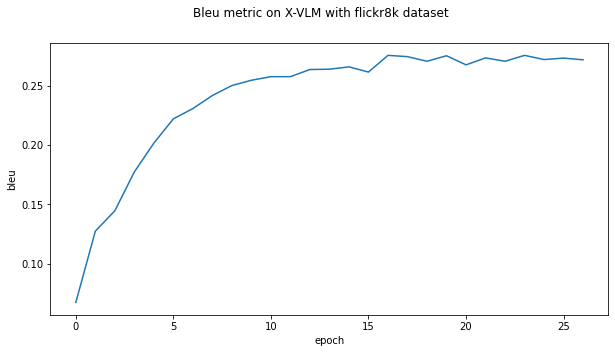

In [ ]:
fig, axs = plt.subplots(1, 1)
fig.suptitle("Bleu metric on X-VLM with flickr8k dataset") 
axs.plot(bleu)
axs.set(xlabel='epoch', ylabel='bleu')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()